# Prediction the total monthly Sales

In [1]:
import pandas as pd
import numpy as np

In [5]:
np.set_printoptions(suppress=True)

In [3]:
#reading the data
StoreSalesData=pd.read_excel("/Users/chandniupadhyay/Downloads/Python IVY Feb-2024/Super Store Sales data.xls")

In [6]:
StoreSalesData.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,China,North Asia,OFF-PA-10000026,Office Supplies,Paper,"Eaton Cards & Envelopes, 8.5 x 11",197.280,4,0.00,35.400
1,2,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,China,North Asia,FUR-FU-10000944,Furniture,Furnishings,"Tenex Door Stop, Black",307.230,7,0.00,21.420
2,3,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,China,North Asia,TEC-CO-10002526,Technology,Copiers,"Sharp Wireless Fax, Digital",1422.240,4,0.00,526.200
3,4,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,China,North Asia,TEC-AC-10002255,Technology,Accessories,"Memorex Keyboard, Erganomic",207.450,3,0.00,78.750
4,5,IN-2014-63178,2014-06-24,2014-06-30,Standard Class,SO-20335,Sean O'Donnell,Consumer,Marikina,National Capital,Philippines,Southeast Asia,OFF-AP-10002882,Office Supplies,Appliances,"KitchenAid Coffee Grinder, Silver",121.074,2,0.15,37.014


In [7]:
#let's expore the data
StoreSalesData.nunique()

Row ID           11000
Order ID          5436
Order Date        1265
Ship Date         1378
Ship Mode            4
Customer ID        795
Customer Name      795
Segment              3
City               655
State              179
Country             23
Region               4
Product ID        2721
Category             3
Sub-Category        17
Product Name      1913
Sales             8815
Quantity            14
Discount            19
Profit            8120
dtype: int64

In [8]:
StoreSalesData.info()
#no emplty value found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         11000 non-null  int64         
 1   Order ID       11000 non-null  object        
 2   Order Date     11000 non-null  datetime64[ns]
 3   Ship Date      11000 non-null  datetime64[ns]
 4   Ship Mode      11000 non-null  object        
 5   Customer ID    11000 non-null  object        
 6   Customer Name  11000 non-null  object        
 7   Segment        11000 non-null  object        
 8   City           11000 non-null  object        
 9   State          11000 non-null  object        
 10  Country        11000 non-null  object        
 11  Region         11000 non-null  object        
 12  Product ID     11000 non-null  object        
 13  Category       11000 non-null  object        
 14  Sub-Category   11000 non-null  object        
 15  Product Name   1100

In [ ]:
# As sales is derived variable of quantity and cost so insted of predicting directly sales,
# we will go for quantity

In [9]:
#lets prepare the data for the time series

def fetch_month(inputDate):
    return(inputDate.month)

def fetch_year(inputDate):
    return(inputDate.year)

StoreSalesData['Month']=StoreSalesData['Order Date'].apply(fetch_month)
StoreSalesData['Year']=StoreSalesData['Order Date'].apply(fetch_year)

In [11]:
StoreSalesData[['Month','Year']].head(10)

,Month,Year
0,8,2013
1,8,2013
2,8,2013
3,8,2013
4,6,2014
5,5,2011
6,8,2012
7,1,2011
8,1,2011
9,5,2012


In [13]:
#checking if we have enough data

print("Years present -> ", StoreSalesData["Year"].sort_values().unique())
print("Months present -> ",StoreSalesData["Month"].sort_values().unique())

Years present ->  [2011 2012 2013 2014]
Months present ->  [ 1  2  3  4  5  6  7  8  9 10 11 12]


In [17]:
#separating the required data
pd.crosstab(columns=StoreSalesData['Month'],
            index=StoreSalesData["Year"],
           values=StoreSalesData["Quantity"],
            aggfunc='sum')

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2011,328,361,442,406,517,631,388,737,722,837,856,1028
2012,531,425,427,427,901,924,380,978,728,1092,1068,847
2013,665,448,527,448,1228,1273,716,1307,1220,1021,1010,1120
2014,951,704,890,727,1284,1416,738,1478,1302,1588,1632,1548


In [22]:
# melting whole data in single column

pd.crosstab(columns=StoreSalesData['Year'],
            index=StoreSalesData["Month"],
           values=StoreSalesData["Quantity"],
            aggfunc='sum').melt()

,Year,value
0,2011,328
1,2011,361
2,2011,442
3,2011,406
4,2011,517
5,2011,631
6,2011,388
7,2011,737
8,2011,722
9,2011,837


In [33]:
SalesQuantity=pd.crosstab(columns=StoreSalesData['Year'],
            index=StoreSalesData["Month"],
           values=StoreSalesData["Quantity"],
            aggfunc='sum').melt()['value']

MonthNames=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']*4

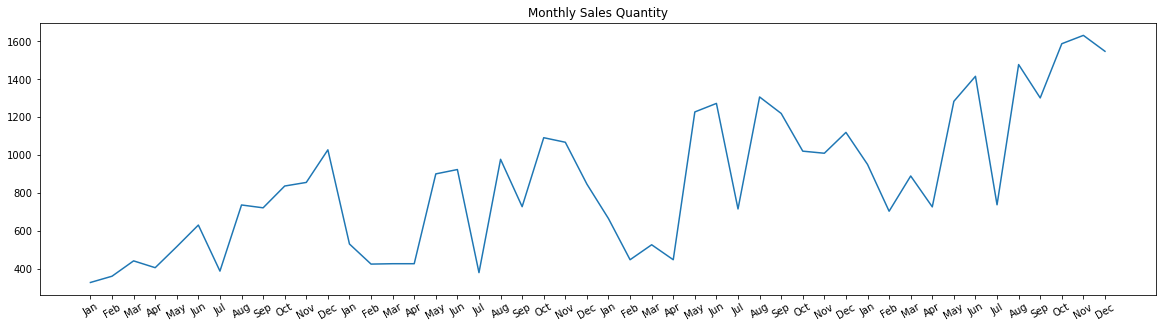

In [73]:
#lets visualize

import matplotlib.pyplot as plt
SalesQuantity.plot(kind='line',figsize=(20,5),title='Monthly Sales Quantity')
plotLabels=plt.xticks(np.arange(0,48,1),MonthNames, rotation=30)

In [35]:
SalesQuantity.values

array([ 328,  361,  442,  406,  517,  631,  388,  737,  722,  837,  856,
       1028,  531,  425,  427,  427,  901,  924,  380,  978,  728, 1092,
       1068,  847,  665,  448,  527,  448, 1228, 1273,  716, 1307, 1220,
       1021, 1010, 1120,  951,  704,  890,  727, 1284, 1416,  738, 1478,
       1302, 1588, 1632, 1548])

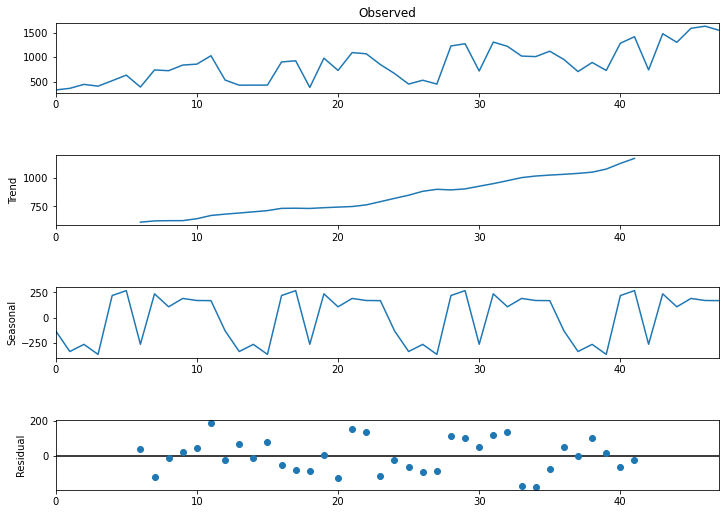

In [50]:
#lets look at the different components which these numbers are consist of

from statsmodels.tsa.seasonal import seasonal_decompose
series=SalesQuantity.values
result=seasonal_decompose(series, period=12)
result.plot()
CurrentFig=plt.gcf()
CurrentFig.set_size_inches(11,8)
plt.show()

In [64]:
#Hyperparameter tuning
#SARIMA Model

In [59]:
def ArimaParameterTuning(inpData,p_values,d_values,q_values,
                        seasonal_p_values,seasonal_d_values,seasonal_q_values,cycle):
    import warnings
    warnings.filterwarnings(action='ignore')
    
    from statsmodels.tsa.statespace.sarimax import SARIMAX
    Result=pd.DataFrame()
    for p_value in p_values:
        for d_value in d_values:
            for q_value in q_values:
                for seasonal_p_value in seasonal_p_values:
                    for seasonal_d_value in seasonal_d_values:
                        for seasonal_q_value in seasonal_q_values:
                            try:
                                model=SARIMAX(inpData, order=(p_value,d_value,q_value),
                                             seasonal_order=(seasonal_p_value,seasonal_d_value,seasonal_q_value, cycle))
                                model_fit=model.fit(disp=False)
                                pred=model_fit.predict(0,len(inpData))
                                accuracy=100- np.mean(abs(pred-inpData)/inpData*100)
                                
                                Result=pd.concat([Result,pd.DataFrame([[p_value,d_value,q_value,
                                                                      seasonal_p_value,seasonal_d_value,seasonal_q_value,
                                                                      accuracy]],columns=['p','d','q',
                                                                                         'seasonal_p','seasonal_d','seasonal_q',
                                                                                         'Accuracy'])])
                            except:
                                pass
    return Result

In [62]:
ResultsData=ArimaParameterTuning(inpData=SalesQuantity,
                  p_values=[0,1], 
                  d_values=[0,1], 
                  q_values=[1,10], 
                  seasonal_p_values=[1,2],                                       
                  seasonal_d_values=[0], 
                  seasonal_q_values=[0],
                  cycle=12)


In [63]:
ResultsData.sort_values('Accuracy',ascending=False).head(5)

,p,d,q,seasonal_p,seasonal_d,seasonal_q,Accuracy
0,1,0,10,2,0,0,80.021914
0,1,0,10,1,0,0,79.734649
0,1,1,10,1,0,0,79.224368
0,0,1,10,1,0,0,79.150966
0,0,1,10,2,0,0,79.012113


Next Six Month Forecast:
 49     968.205987
50    1038.962677
51     930.224825
52    1499.056063
53    1640.816770
54    1099.922692
Name: Forecast, dtype: float64
#### Accuracy of model: 80.02 ####


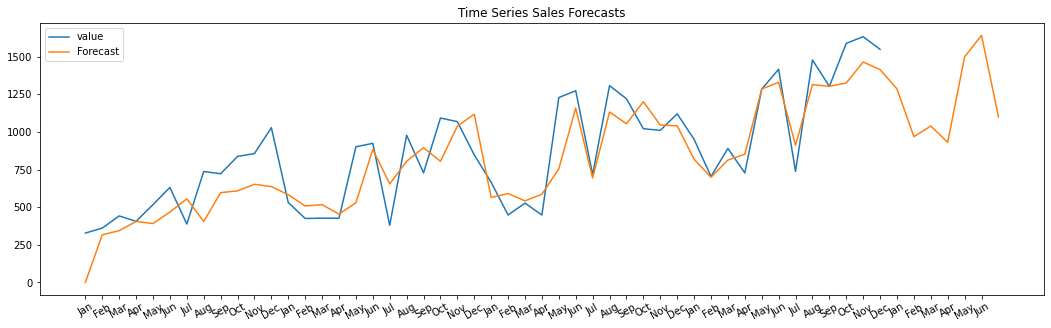

In [70]:
#creating the final model

from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

#training the model on full DataSet with best HyperParameter set

SARIMA_Model=SARIMAX(SalesQuantity,order=(1,0,10),seasonal_order=(2,0,0,12))
#Fitting the model on data
SalesModel=SARIMA_Model.fit(disp=False)
#Forecasting the data for upcoming six months
FutureMonths=6
forecast=SalesModel.predict(start=0,end=(len(SalesQuantity)+FutureMonths),typ='levels').rename('Forecast')
print("Next Six Month Forecast:\n",forecast[-FutureMonths:])

SalesQuantity.plot(figsize = (18, 5), legend = True, title='Time Series Sales Forecasts')
forecast.plot(figsize = (18, 5), legend = True)


MAPE=np.mean(abs(SalesQuantity-forecast)/SalesQuantity)*100
print('#### Accuracy of model:', round(100-MAPE,2), '####')

PlotMonthNames=MonthNames+MonthNames[0:FutureMonths]
plotLabels=plt.xticks(np.arange(0,len(PlotMonthNames),1),PlotMonthNames, rotation=30)

In [77]:
#category wise prediction

StoreSalesData.groupby('Category').sum()

,Row ID,Sales,Quantity,Discount,Profit,Month,Year
Category,,,,,,,
Furniture,13299177,1.343623e+06,9096,335.49,125927.2905,17839,4887064
Office Supplies,33974643,8.843154e+05,23133,974.29,105512.4025,45768,12430938
Technology,13231680,1.357490e+06,8993,327.15,204593.8560,17465,4822535


In [78]:
#predicting sales for technology
cond=StoreSalesData['Category']=='Technology'
TechnologySalesData=StoreSalesData[cond]
TechnologySalesData.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Year
2,3,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,...,TEC-CO-10002526,Technology,Copiers,"Sharp Wireless Fax, Digital",1422.240,4,0.00,526.200,8,2013
3,4,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,...,TEC-AC-10002255,Technology,Accessories,"Memorex Keyboard, Erganomic",207.450,3,0.00,78.750,8,2013
6,7,IN-2012-15361,2012-08-15,2012-08-21,Standard Class,CS-12130,Chad Sievert,Consumer,Tokyo,Tokyo,...,TEC-PH-10001354,Technology,Phones,"Motorola Speaker Phone, Full Size",262.140,2,0.00,73.380,8,2012
9,10,ID-2012-63535,2012-05-09,2012-05-15,Standard Class,ML-17410,Maris LaWare,Consumer,Hobart,Tasmania,...,TEC-PH-10003062,Technology,Phones,"Apple Audio Dock, Full Size",504.540,5,0.40,-42.060,5,2012
12,13,ID-2011-65117,2011-07-11,2011-07-15,Standard Class,SW-20245,Scot Wooten,Consumer,Manila,National Capital,...,TEC-PH-10001354,Technology,Phones,"Motorola Speaker Phone, Full Size",589.815,6,0.25,23.535,7,2011


In [79]:
#separating the required data
pd.crosstab(columns=TechnologySalesData['Month'],
            index=StoreSalesData["Year"],
           values=StoreSalesData["Quantity"],
            aggfunc='sum')

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2011,70,102,106,65,138,143,100,190,103,159,195,228
2012,132,108,108,79,211,218,89,223,133,306,209,159
2013,140,100,127,92,216,307,185,280,253,209,270,221
2014,178,174,191,162,285,291,162,299,263,321,363,330


In [80]:
TechSalesQuantity=pd.crosstab(columns=TechnologySalesData['Year'],
            index=StoreSalesData["Month"],
           values=StoreSalesData["Quantity"],
            aggfunc='sum').melt()['value']



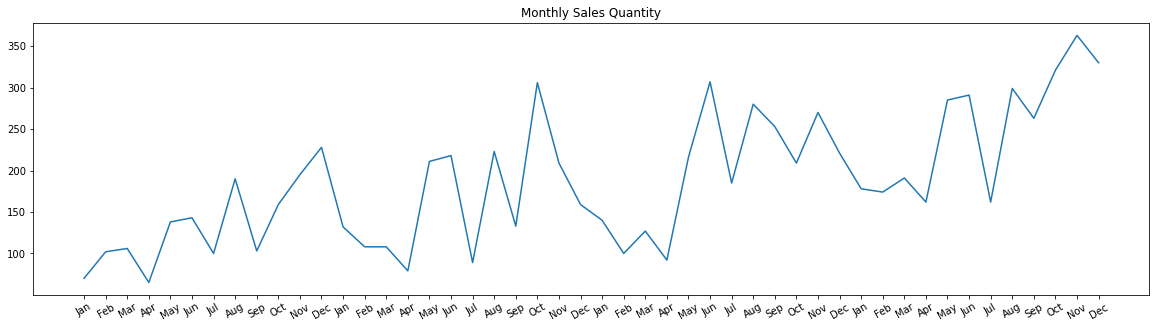

In [81]:
import matplotlib.pyplot as plt
TechSalesQuantity.plot(kind='line',figsize=(20,5),title='Monthly Sales Quantity')
plotLabels=plt.xticks(np.arange(0,48,1),MonthNames, rotation=30)

In [83]:
ResultsData=ArimaParameterTuning(inpData=TechSalesQuantity,
                  p_values=[0,10], 
                  d_values=[0], 
                  q_values=[0,5],  
                  seasonal_p_values=[0,2],                                       
                  seasonal_d_values=[0], 
                  seasonal_q_values=[0,1,3],
                  cycle=12
                 )

In [84]:
ResultsData.sort_values('Accuracy', ascending=False).head(10)

,p,d,q,seasonal_p,seasonal_d,seasonal_q,Accuracy
0,10,0,5,2,0,3,78.174820
0,10,0,5,2,0,0,78.078680
0,10,0,0,2,0,1,77.233504
0,10,0,0,2,0,0,77.173475
0,10,0,0,2,0,3,76.765551
0,10,0,5,2,0,1,76.612837
0,10,0,5,0,0,3,76.538254
0,10,0,0,0,0,3,75.588602
0,10,0,5,0,0,1,75.463178
0,10,0,0,0,0,1,73.784052


In [90]:
#log Transformation of the data
import numpy as np
TechSalesQuantityLOG=np.log(TechSalesQuantity)

In [91]:
ResultsDataLOG=ArimaParameterTuning(inpData=TechSalesQuantityLOG,
                  p_values=[0,10], 
                  d_values=[0], 
                  q_values=[0,5],  
                  seasonal_p_values=[0,2],                                       
                  seasonal_d_values=[0], 
                  seasonal_q_values=[0,1,3],
                  cycle=12
                 )

In [93]:
ResultsDataLOG.sort_values('Accuracy', ascending=False).head(10)

,p,d,q,seasonal_p,seasonal_d,seasonal_q,Accuracy
0,10,0,5,2,0,0,93.911058
0,10,0,5,2,0,3,93.894536
0,10,0,0,2,0,1,93.784164
0,10,0,5,0,0,3,93.773999
0,10,0,0,2,0,3,93.767465
0,10,0,0,2,0,0,93.752090
0,10,0,5,0,0,1,93.583818
0,10,0,0,0,0,3,93.583097
0,10,0,0,0,0,1,93.178437
0,10,0,5,0,0,0,93.056734


Next Six Month Forecast:
 49    202.112207
50    194.958696
51    154.962344
52    320.981543
53    394.091811
54    255.214404
Name: Forecast, dtype: float64
#### Accuracy of model: 95.24 ####


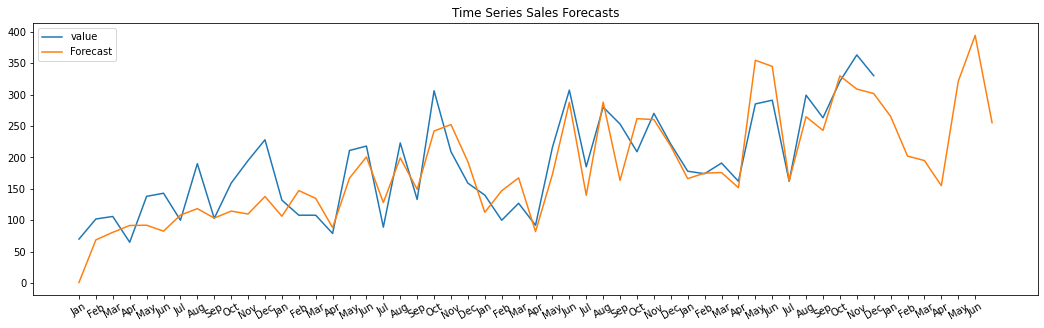

In [101]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

#training the model on full DataSet with best HyperParameter set

SARIMA_Model=SARIMAX(TechSalesQuantityLOG,order=(10,0,5),seasonal_order=(2,0,0,12))
#Fitting the model on data
SalesModel=SARIMA_Model.fit(disp=False)
#Forecasting the data for upcoming six months
FutureMonths=6
forecast=SalesModel.predict(start=0,end=(len(TechSalesQuantityLOG)+FutureMonths),typ='levels').rename('Forecast')
#bringing the data on real scale
forecast=np.exp(forecast)
print("Next Six Month Forecast:\n",forecast[-FutureMonths:])

TechSalesQuantity.plot(figsize = (18, 5), legend = True, title='Time Series Sales Forecasts')
forecast.plot(figsize = (18, 5), legend = True)


MAPE=np.mean(abs(TechSalesQuantity-forecast)/SalesQuantity)*100
print('#### Accuracy of model:', round(100-MAPE,2), '####')

PlotMonthNames=MonthNames+MonthNames[0:FutureMonths]
plotLabels=plt.xticks(np.arange(0,len(PlotMonthNames),1),PlotMonthNames, rotation=30)

In [109]:
cond2=StoreSalesData['Category']=='Office Supplies'
OfficeSupplySalesData=StoreSalesData[cond2]
OfficeSupplySalesData.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Month,Year
0,1,IN-2013-27828,2013-08-26,2013-08-30,Standard Class,VT-21700,Valerie Takahito,Home Office,Luoyang,Fujian,...,OFF-PA-10000026,Office Supplies,Paper,"Eaton Cards & Envelopes, 8.5 x 11",197.280,4,0.00,35.400,8,2013
4,5,IN-2014-63178,2014-06-24,2014-06-30,Standard Class,SO-20335,Sean O'Donnell,Consumer,Marikina,National Capital,...,OFF-AP-10002882,Office Supplies,Appliances,"KitchenAid Coffee Grinder, Silver",121.074,2,0.15,37.014,6,2014


In [110]:
pd.crosstab(columns=OfficeSupplySalesData['Month'],
           index=OfficeSupplySalesData['Year'],
           values=OfficeSupplySalesData['Quantity'],
           aggfunc='sum')

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2011,214,177,241,259,258,312,229,361,449,473,467,588
2012,265,215,225,246,539,543,217,562,465,615,610,513
2013,349,238,283,237,738,719,367,729,658,565,521,637
2014,547,363,439,391,758,833,410,903,705,892,916,892


In [113]:
OfficeSupplySalesQuantity=pd.crosstab(columns=OfficeSupplySalesData['Year'],
           index=OfficeSupplySalesData['Month'],
           values=OfficeSupplySalesData['Quantity'],
           aggfunc='sum').melt()['value']

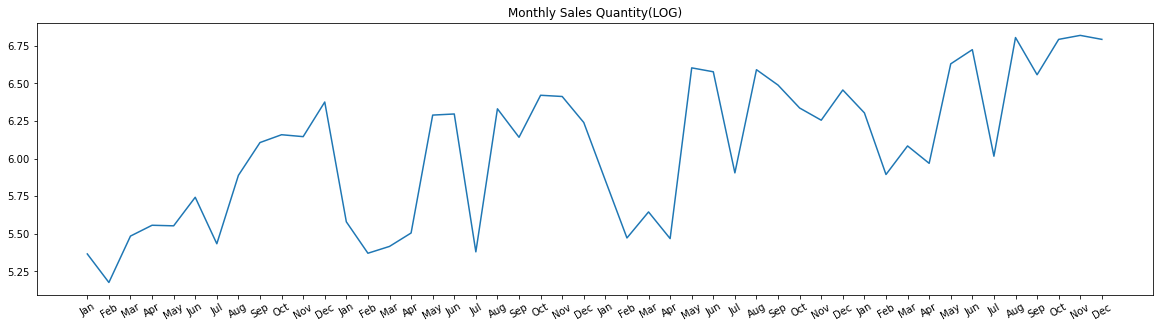

In [121]:
#import matplotlib.pyplot as plt
#OfficeSupplySalesQuantity.plot(kind='line',figsize=(20,5),title='Monthly Sales Quantity')
#plotLabels=plt.xticks(np.arange(0,48,1),MonthNames, rotation=30)

OfficeSupplySalesQuantityLOG=np.log(OfficeSupplySalesQuantity)
OfficeSupplySalesQuantityLOG.plot(kind='line',figsize=(20,5),title='Monthly Sales Quantity(LOG)')
plotLabels=plt.xticks(np.arange(0,48,1),MonthNames, rotation=30)

In [122]:
ResultsData=ArimaParameterTuning(inpData=OfficeSupplySalesQuantityLOG,
                  p_values=[0,10], 
                  d_values=[0], 
                  q_values=[0,5],  
                  seasonal_p_values=[0,2],                                       
                  seasonal_d_values=[0], 
                  seasonal_q_values=[0,1,3],
                  cycle=12
                 )


In [123]:
ResultsData.sort_values('Accuracy', ascending=False).head(10)

,p,d,q,seasonal_p,seasonal_d,seasonal_q,Accuracy
0,10,0,5,2,0,3,94.734449
0,10,0,5,2,0,1,94.696302
0,10,0,5,2,0,0,94.682569
0,10,0,0,2,0,1,94.586618
0,10,0,0,2,0,3,94.585053
0,10,0,0,2,0,0,94.566714
0,10,0,5,0,0,3,94.545889
0,10,0,0,0,0,3,94.448120
0,10,0,0,0,0,1,94.078055
0,10,0,5,0,0,1,94.061822


Next Six Month Forecast:
 49     435.012683
50     503.428036
51     471.841611
52     952.867348
53    1066.810267
54     591.031989
Name: Forecast, dtype: float64
#### Accuracy of model: 79.78 ####


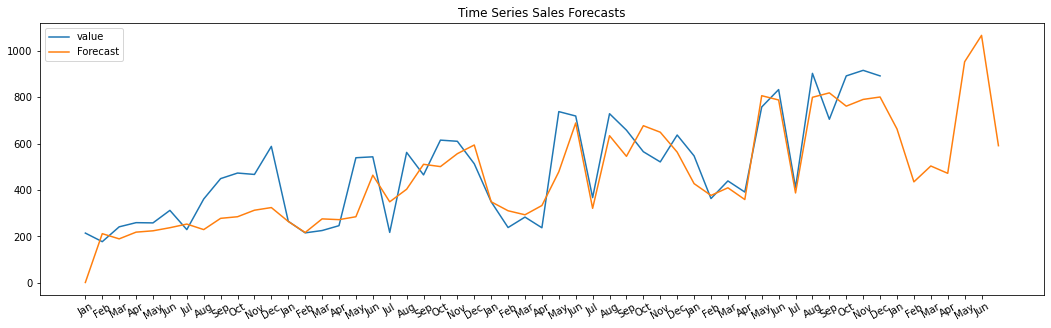

In [124]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

#training the model on full DataSet with best HyperParameter set

SARIMA_Model=SARIMAX(OfficeSupplySalesQuantityLOG,order=(10,0,5),seasonal_order=(2,0,0,12))
#Fitting the model on data
SalesModel=SARIMA_Model.fit(disp=False)
#Forecasting the data for upcoming six months
FutureMonths=6
forecast=SalesModel.predict(start=0,end=(len(OfficeSupplySalesQuantityLOG)+FutureMonths),typ='levels').rename('Forecast')
#bringing the data on real scale
forecast=np.exp(forecast)
print("Next Six Month Forecast:\n",forecast[-FutureMonths:])

OfficeSupplySalesQuantity.plot(figsize = (18, 5), legend = True, title='Time Series Sales Forecasts')
forecast.plot(figsize = (18, 5), legend = True)


MAPE=np.mean(abs(OfficeSupplySalesQuantity-forecast)/OfficeSupplySalesQuantity)*100
print('#### Accuracy of model:', round(100-MAPE,2), '####')

PlotMonthNames=MonthNames+MonthNames[0:FutureMonths]
plotLabels=plt.xticks(np.arange(0,len(PlotMonthNames),1),PlotMonthNames, rotation=30)